### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Load The Data

In [2]:
data_fake = pd.read_csv("Fake.csv", encoding='latin-1')

In [3]:
data_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [4]:
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [5]:
data_true = pd.read_csv("True.csv", encoding='latin-1', on_bad_lines='skip')

C:\Users\Admin\AppData\Local\Temp\ipykernel_21072\3745419156.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_true = pd.read_csv("True.csv", encoding='latin-1', error_bad_lines=False)
Skipping line 11067: expected 4 fields, saw 8



In [6]:
data_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [7]:
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
data_fake.shape, data_true.shape

((23481, 4), (21416, 4))

# Data Pre-processing
### Data Cleaning, Data Visualization and performing Exploratory Data Analysis

In [9]:
# Add lable column to Categorize data in fake and real news.
data_fake['label'] = 0
data_true['label'] = 1

In [10]:
merged_data = pd.concat([data_fake,data_true])

In [11]:
merged_data

title  \
0       Donald Trump Sends Out Embarrassing New Year...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obamas Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
21411  'Fully committed' NATO backs new U.S. approach...   
21412  LexisNexis withdrew two products from Chinese ...   
21413  Minsk cultural hub becomes haven from authorities   
21414  Vatican upbeat on possibility of Pope Francis ...   
21415  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       News   
3      On Christmas day, Donald Trump announced that ...       News   
4      Pope Francis used his annual Christmas Day mes...       News   
...                                                  ...        ...   
21411  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21412  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21413  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21414  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21415  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                    date  label  
0      December 31, 2017      0  
1      December 31, 2017      0  
2      December 30, 2017      0  
3      December 29, 2017      0  
4      December 25, 2017      0  
...                  ...    ...  
21411   August 22, 2017       1  
21412   August 22, 2017       1  
21413   August 22, 2017       1  
21414   August 22, 2017       1  
21415   August 22, 2017       1  

[44897 rows x 5 columns]

In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44897 entries, 0 to 21415
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44897 non-null  object
 1   text     44897 non-null  object
 2   subject  44897 non-null  object
 3   date     44897 non-null  object
 4   label    44897 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [13]:
merged_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [14]:
merged_data.title.count()

44897

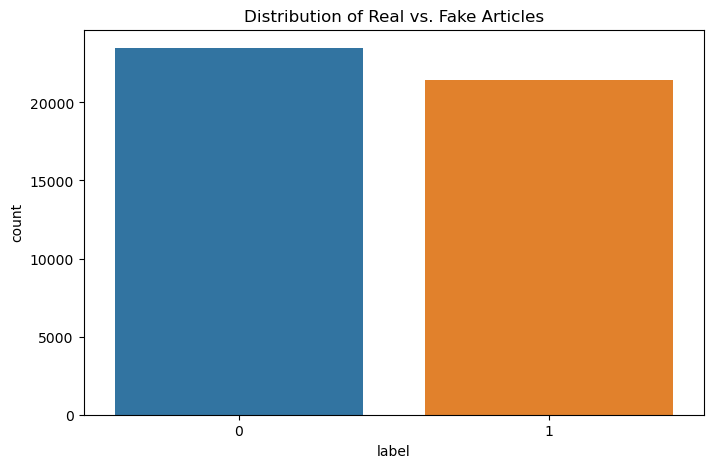

In [15]:
# Visualize the distribution of real vs. fake articles
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=merged_data)
plt.title("Distribution of Real vs. Fake Articles")
plt.show()

In [16]:
merged_data.subject.value_counts()

politicsNews       11271
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

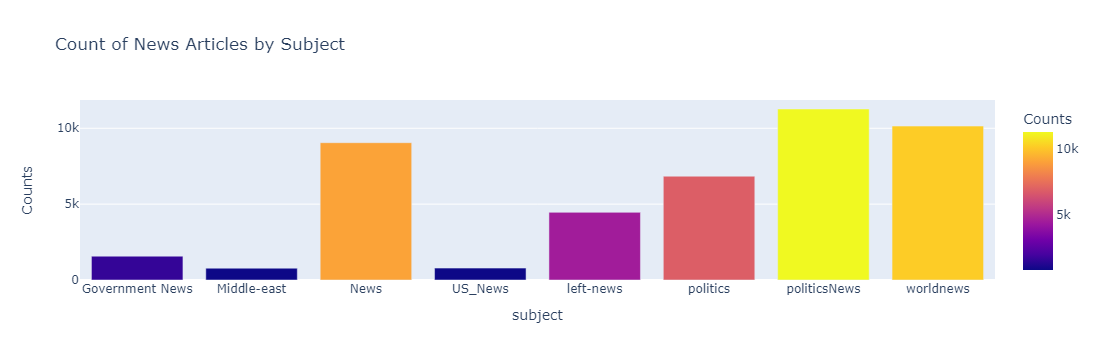

In [17]:
sub_check=merged_data.groupby('subject').apply(lambda x:x['title'].count()).reset_index(name='Counts')
fig=px.bar(sub_check,x='subject',y='Counts',color='Counts',title='Count of News Articles by Subject')
fig.show()

In [18]:
#drop unnecessory columns
merged_data.drop('title', axis=1, inplace=True)
merged_data.drop('subject', axis=1, inplace=True)
merged_data.drop('date', axis=1, inplace=True)

In [19]:
merged_data.head()

text  label
0  Donald Trump just couldn t wish all Americans ...      0
1  House Intelligence Committee Chairman Devin Nu...      0
2  On Friday, it was revealed that former Milwauk...      0
3  On Christmas day, Donald Trump announced that ...      0
4  Pope Francis used his annual Christmas Day mes...      0

### Text Prepocessing

In [20]:
merged_data.reset_index(drop=True, inplace=True)
merged_data['text'][3]

'On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the fo

In [21]:
#remove html tags
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return re.sub(r'http\S+', '', clean_text)

merged_data['text'] = merged_data['text'].apply(remove_html_tags)

In [22]:
merged_data.reset_index(drop=True, inplace=True)
merged_data['text'][3]

'On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year.  pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the following message in the 

In [23]:

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    return text
merged_data['text'] = merged_data['text'].apply(preprocess_text)

In [24]:
merged_data['text'][3]

'on christmas day donald trump announced that he would  be back to work  the following day but he is golfing for the fourth day in a row the former reality show star blasted former president barack obama for playing golf and now trump is on track to outpace the number of golf games his predecessor playedupdated my tracker of trump s appearances at trump properties rounds of golf including today s at this pace he ll pass obama s firstterm total by july  next year  pictwittercomgemcjqtbh  philip bump pbump december   that makes what a washington post reporter discovered on trump s website really weird but everything about this administration is bizarre af the coding contained a reference to obama and golf  unlike obama we are working to fix the problem   and not on the golf course  however the coding wasn t done correctlythe website of donald trump who has spent several days in a row at the golf course is coded to serve up the following message in the event of an internal server error  p

In [25]:
#word tokenization
def tokenize_text(text):
    tokens = word_tokenize(text)
    return " ".join(tokens)

merged_data['text'] = merged_data['text'].apply(tokenize_text)

In [26]:
merged_data['text'][3]

'on christmas day donald trump announced that he would be back to work the following day but he is golfing for the fourth day in a row the former reality show star blasted former president barack obama for playing golf and now trump is on track to outpace the number of golf games his predecessor playedupdated my tracker of trump s appearances at trump properties rounds of golf including today s at this pace he ll pass obama s firstterm total by july next year pictwittercomgemcjqtbh philip bump pbump december that makes what a washington post reporter discovered on trump s website really weird but everything about this administration is bizarre af the coding contained a reference to obama and golf unlike obama we are working to fix the problem and not on the golf course however the coding wasn t done correctlythe website of donald trump who has spent several days in a row at the golf course is coded to serve up the following message in the event of an internal server error pictwittercom

In [27]:


stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()  # Tokenize the text into words
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

merged_data['text'] = merged_data['text'].apply(remove_stopwords)

In [28]:
merged_data['text'] = merged_data['text'].apply(remove_stopwords)

In [29]:
merged_data['total_words'] = merged_data['text'].apply(lambda x: len(x.split()))

In [30]:
merged_data['total_words']

0        258
1        178
2        315
3        243
4        211
        ... 
44892    259
44893     75
44894    169
44895    117
44896    135
Name: total_words, Length: 44897, dtype: int64

In [31]:
merged_data['total_words'].sum()

10270574

In [32]:
# Calculate total words for fake news
fake_data = merged_data[merged_data['label'] == 0]
fake_data['total_words'] = fake_data['text'].apply(lambda x: len(x.split()))

C:\Users\Admin\AppData\Local\Temp\ipykernel_21072\181398088.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
fake_data['total_words'].sum()

5411845

In [34]:
# Calculate total words for real news
real_data = merged_data[merged_data['label'] == 1]
real_data['total_words'] = real_data['text'].apply(lambda x: len(x.split()))

C:\Users\Admin\AppData\Local\Temp\ipykernel_21072\266805878.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
real_data['total_words'].sum()

4858729

<Figure size 1000x600 with 0 Axes>

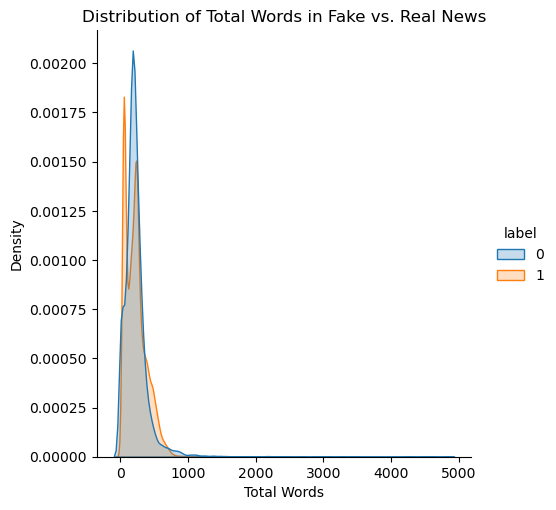

In [36]:
# Visualization using displot
plt.figure(figsize=(10, 6))
sns.displot(merged_data, x='total_words', hue='label', kind='kde', fill=True)
plt.title("Distribution of Total Words in Fake vs. Real News")
plt.xlabel("Total Words")
plt.show()

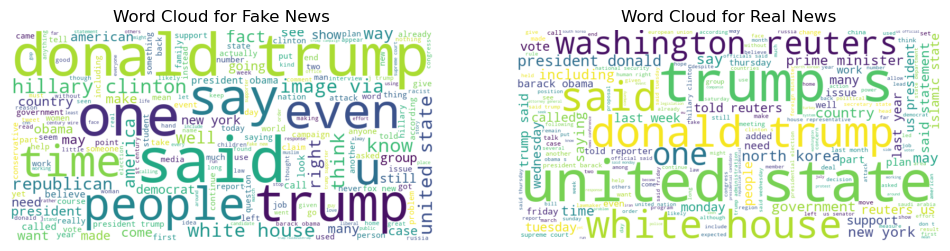

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud for fake news
fake_text = " ".join(merged_data[merged_data['label'] == 0]['text'])
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

# Create a WordCloud for real news
real_text = " ".join(merged_data[merged_data['label'] == 1]['text'])
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Fake News")

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Real News")

plt.show()

### Word Cloud with TF-IDF Vectorizer

In [38]:
tfidf_vectorizer = TfidfVectorizer()

In [39]:
fake_corpus = merged_data[merged_data['label'] == 0]['text']
fake_tfidf_matrix = tfidf_vectorizer.fit_transform(fake_corpus)

In [40]:
feature_names_fake = tfidf_vectorizer.get_feature_names_out()

In [41]:
real_corpus = merged_data[merged_data['label'] == 1]['text']
real_tfidf_matrix = tfidf_vectorizer.fit_transform(real_corpus)

In [42]:
feature_names_real = tfidf_vectorizer.get_feature_names_out()


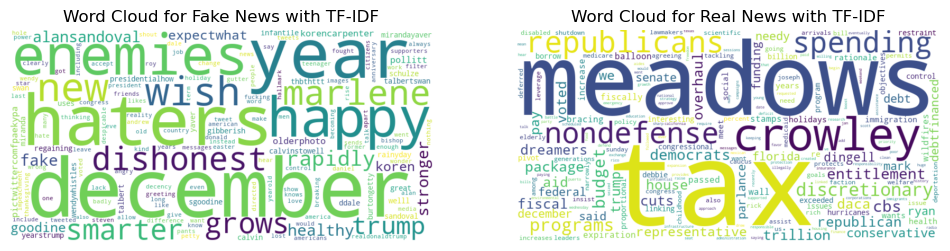

In [43]:
def create_word_cloud_from_tfidf(tfidf_matrix, feature_names):
    tfidf_dict = {}
    for i, feature in enumerate(feature_names):
        tfidf_dict[feature] = tfidf_matrix[0, i]  # Assuming you want to create a word cloud for the first document

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)
    return wordcloud
# Create word clouds for fake and real news
fake_wordcloud = create_word_cloud_from_tfidf(fake_tfidf_matrix, feature_names_fake)
real_wordcloud = create_word_cloud_from_tfidf(real_tfidf_matrix, feature_names_real)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Fake News with TF-IDF")

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Real News with TF-IDF")

plt.show()

In [44]:
fake_tfidf_matrix.shape

(23481, 171598)

In [45]:
real_tfidf_matrix.shape

(21416, 76056)

### Word Cloud with TF-IDF Vectorizer_unigram

In [46]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=5000)

In [47]:
fake_corpus_ngram = merged_data[merged_data['label'] == 0]['text']
fake_tfidf_matrix = tfidf_vectorizer.fit_transform(fake_corpus_ngram)

In [48]:
feature_names_fake_ngram = tfidf_vectorizer.get_feature_names_out()

In [49]:
real_corpus_ngram = merged_data[merged_data['label'] == 1]['text']
real_tfidf_matrix = tfidf_vectorizer.fit_transform(real_corpus_ngram)

In [50]:
feature_names_real_ngram = tfidf_vectorizer.get_feature_names_out()

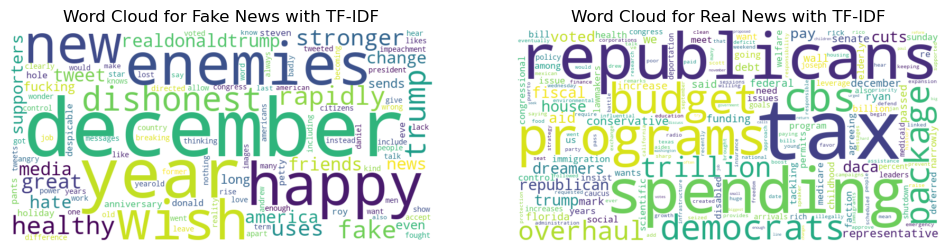

In [51]:
def create_word_cloud_from_tfidf(tfidf_matrix, feature_names):
    tfidf_dict = {}
    for i, feature in enumerate(feature_names):
        tfidf_dict[feature] = tfidf_matrix[0, i]  # Assuming you want to create a word cloud for the first document

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)
    return wordcloud
# Create word clouds for fake and real news
fake_wordcloud = create_word_cloud_from_tfidf(fake_tfidf_matrix, feature_names_fake_ngram)
real_wordcloud = create_word_cloud_from_tfidf(real_tfidf_matrix, feature_names_real_ngram)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Fake News with TF-IDF")

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Real News with TF-IDF")

plt.show()

### Word Cloud with TF-IDF Vectorizer_Bigram

In [52]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2), max_features=5000)

In [53]:
fake_corpus_bigram = merged_data[merged_data['label'] == 0]['text']
fake_tfidf_matrix = tfidf_vectorizer.fit_transform(fake_corpus_bigram)

In [54]:
feature_names_fake_bigram = tfidf_vectorizer.get_feature_names_out()

In [55]:
real_corpus_bigram = merged_data[merged_data['label'] == 1]['text']
real_tfidf_matrix = tfidf_vectorizer.fit_transform(real_corpus_bigram)

In [56]:
feature_names_real_bigram = tfidf_vectorizer.get_feature_names_out()

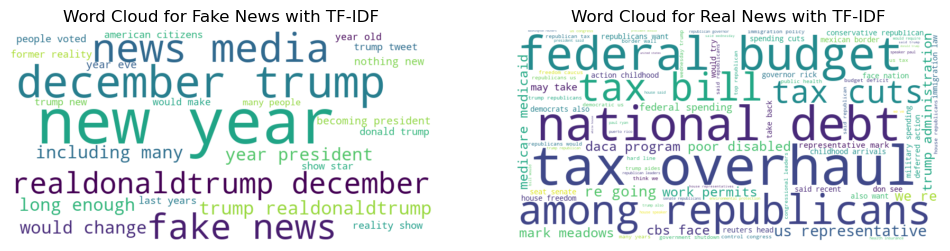

In [57]:
def create_word_cloud_from_tfidf(tfidf_matrix, feature_names):
    tfidf_dict = {}
    for i, feature in enumerate(feature_names):
        tfidf_dict[feature] = tfidf_matrix[0, i]  # Assuming you want to create a word cloud for the first document

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)
    return wordcloud
# Create word clouds for fake and real news
fake_wordcloud = create_word_cloud_from_tfidf(fake_tfidf_matrix, feature_names_fake_bigram)
real_wordcloud = create_word_cloud_from_tfidf(real_tfidf_matrix, feature_names_real_bigram)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Fake News with TF-IDF")

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Real News with TF-IDF")

plt.show()

### Word Cloud with TF-IDF Vectorizer_Trigram

In [58]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(3, 3), max_features=5000)

In [59]:
fake_corpus_trigram = merged_data[merged_data['label'] == 0]['text']
fake_tfidf_matrix = tfidf_vectorizer.fit_transform(fake_corpus_trigram)

In [60]:
feature_names_fake_trigram = tfidf_vectorizer.get_feature_names_out()

In [61]:
real_corpus_trigram = merged_data[merged_data['label'] == 1]['text']
real_tfidf_matrix = tfidf_vectorizer.fit_transform(real_corpus_trigram)

In [62]:
feature_names_real_trigram = tfidf_vectorizer.get_feature_names_out()

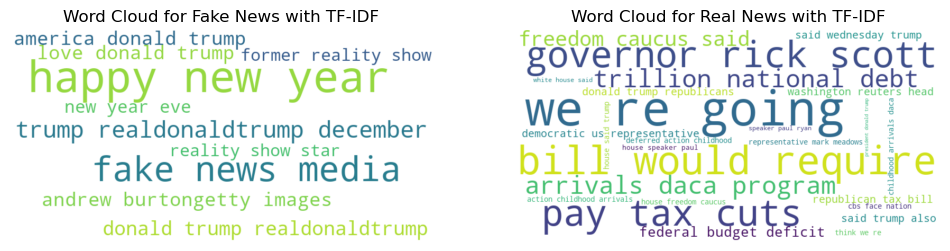

In [63]:
def create_word_cloud_from_tfidf(tfidf_matrix, feature_names):
    tfidf_dict = {}
    for i, feature in enumerate(feature_names):
        tfidf_dict[feature] = tfidf_matrix[0, i]  # Assuming you want to create a word cloud for the first document

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)
    return wordcloud
# Create word clouds for fake and real news
fake_wordcloud = create_word_cloud_from_tfidf(fake_tfidf_matrix, feature_names_fake_trigram)
real_wordcloud = create_word_cloud_from_tfidf(real_tfidf_matrix, feature_names_real_trigram)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Fake News with TF-IDF")

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Real News with TF-IDF")

plt.show()

# Model Evaluation
## Cross Validation and Hyperparameter Tunning

In [64]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer,ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline

# Split the data into features (X) and target variable (y)
X = merged_data['text']
y = merged_data['label']

models = [
    ("Naive Bayes", make_pipeline(TfidfVectorizer(ngram_range=(1, 1), max_features=5000), MultinomialNB())),
    ("Random Forest", make_pipeline(TfidfVectorizer(ngram_range=(1, 1), max_features=5000), RandomForestClassifier(random_state=42))),
    ("Logistic Regression", make_pipeline(TfidfVectorizer(ngram_range=(1, 1), max_features=5000), LogisticRegression(max_iter=100)))
]



Model: Naive Bayes
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {}
Best Cross-Validation Accuracy: 0.9350


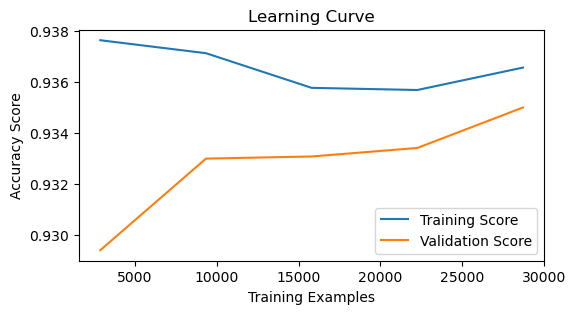

Test Set Accuracy: 0.9329
Train Set Accuracy: 0.9364
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      4697
           1       0.92      0.94      0.93      4283

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     18784
           1       0.93      0.93      0.93     17133

    accuracy                           0.94     35917
   macro avg       0.94      0.94      0.94     35917
weighted avg       0.94      0.94      0.94     35917



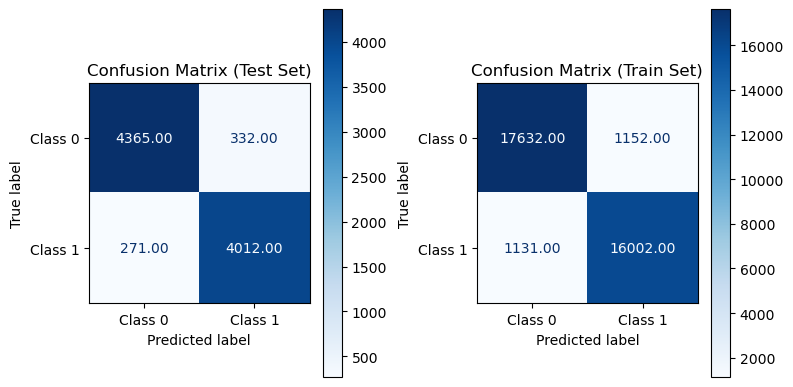

Model: Random Forest
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'randomforestclassifier__n_estimators': 100}
Best Cross-Validation Accuracy: 0.9972


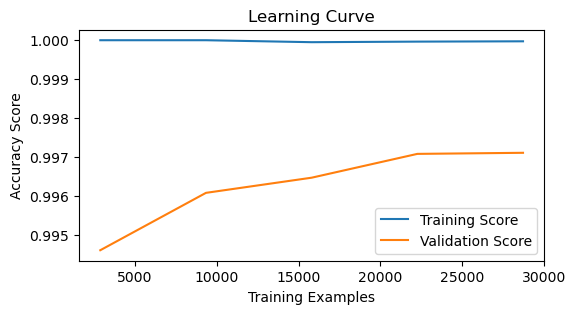

Test Set Accuracy: 0.9981
Train Set Accuracy: 1.0000
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4697
           1       1.00      1.00      1.00      4283

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18784
           1       1.00      1.00      1.00     17133

    accuracy                           1.00     35917
   macro avg       1.00      1.00      1.00     35917
weighted avg       1.00      1.00      1.00     35917



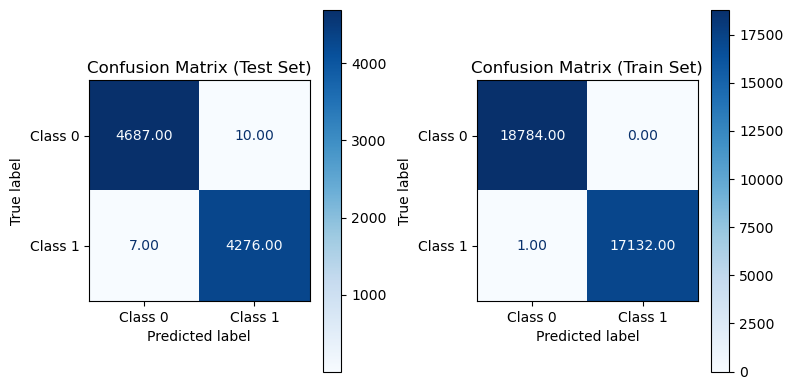

Model: Logistic Regression
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:979: UserWarning:

One or more of the test scores are non-finite: [       nan 0.8316398         nan 0.95010732        nan 0.97310476
        nan 0.98652448        nan 0.9925662         nan 0.9929838 ]

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Best Parameters: {'logisticregression__C': 100, 'logisticregression__penalty': 'l2'}
Best Cross-Validation Accuracy: 0.9930


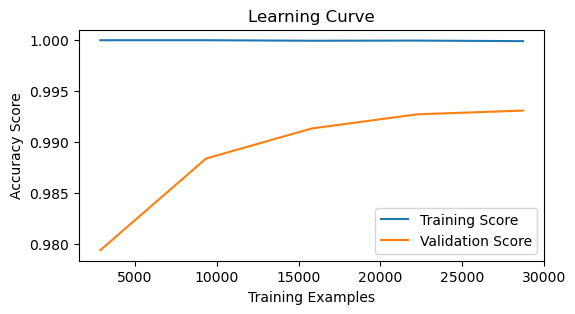

Test Set Accuracy: 0.9940
Train Set Accuracy: 0.9999
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4697
           1       0.99      0.99      0.99      4283

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18784
           1       1.00      1.00      1.00     17133

    accuracy                           1.00     35917
   macro avg       1.00      1.00      1.00     35917
weighted avg       1.00      1.00      1.00     35917



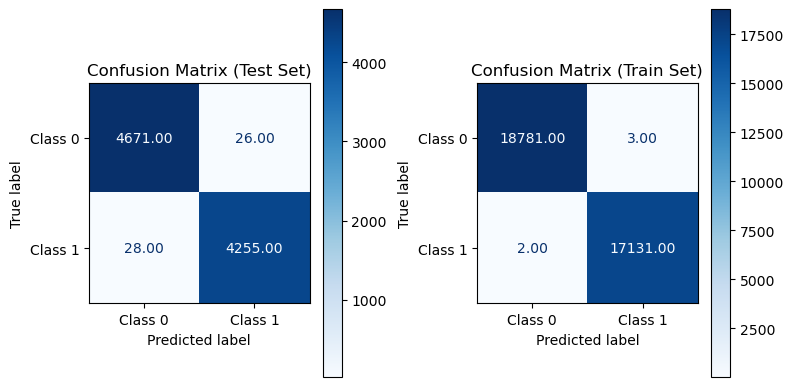

In [65]:
from sklearn.model_selection import learning_curve

# Iterate over models
for model_name, model in models:
    print(f"Model: {model_name}")
    
    # Split the data into training and testing sets with stratified sampling
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Hyperparameter tuning using GridSearchCV
    if model_name == "Naive Bayes":
        param_grid = {}
    elif model_name == "Random Forest":
        param_grid = {'randomforestclassifier__n_estimators': [50, 100]}
    elif model_name == "Logistic Regression":
        param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],'logisticregression__penalty': ['l1', 'l2']}
    
    grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                               scoring=make_scorer(accuracy_score), verbose=1, n_jobs=-1)
    
    # Fit the model with hyperparameter tuning
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and the corresponding accuracy
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Accuracy: {:.4f}".format(grid_search.best_score_))
    
    # Plot learning curve
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        grid_search.best_estimator_, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=make_scorer(accuracy_score), n_jobs=-1, return_times=True
    )

    # Plot the learning curve
    plt.figure(figsize=(6, 3))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()
    
    # Evaluate the model on the test set
    y_pred_test = grid_search.best_estimator_.predict(X_test)
    y_pred_train = grid_search.best_estimator_.predict(X_train)
    
    # Print the test set metrics
    print("Test Set Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_test)))
    print("Train Set Accuracy: {:.4f}".format(accuracy_score(y_train, y_pred_train)))
    
    # Print the classification report
    print("Classification Report (Test):\n", classification_report(y_test, y_pred_test))
    print("Classification Report (Train):\n", classification_report(y_train, y_pred_train))
    
    # Plot confusion matrix for test set
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # Adjust the figsize as needed
    disp.plot(cmap=plt.cm.Blues, values_format=".2f", ax=ax[0])
    ax[0].set_title('Confusion Matrix (Test Set)')

    # Plot confusion matrix for train set
    cm_train = confusion_matrix(y_train, y_pred_train)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Class 0', 'Class 1'])
    disp_train.plot(cmap=plt.cm.Blues, values_format=".2f", ax=ax[1])
    ax[1].set_title('Confusion Matrix (Train Set)')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()
    plt.show()

    print("="*50)


    

### We have got high accuracy for Random Forest classifier with best hyperparameter n_estimator=100

# Model Selection and Make Prediction
### Model Building_ Random Forest Classifier

Test Set Accuracy: 0.9987
Train Set Accuracy: 1.0000
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4697
           1       1.00      1.00      1.00      4283

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18784
           1       1.00      1.00      1.00     17133

    accuracy                           1.00     35917
   macro avg       1.00      1.00      1.00     35917
weighted avg       1.00      1.00      1.00     35917



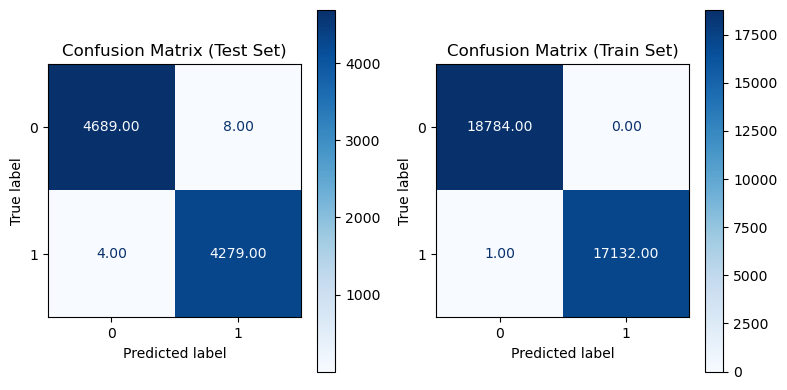

In [66]:
from sklearn.utils.multiclass import unique_labels
# Split the data into features (X) and target variable (y)
X = merged_data['text']
y = merged_data['label']

# Define the models
vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=5000)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Fit the classifier on the vectorized training data
classifier.fit(X_train_vectorized, y_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the test set
y_pred_test = classifier.predict(X_test_vectorized)
y_pred_train = classifier.predict(X_train_vectorized)

# Print the test set metrics
print("Test Set Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_test)))
print("Train Set Accuracy: {:.4f}".format(accuracy_score(y_train, y_pred_train)))

# Print the classification report
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test))
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train))

# Plot confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels(y_test, y_pred_test))
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # Adjust the figsize as needed
disp.plot(cmap=plt.cm.Blues, values_format=".2f", ax=ax[0])
ax[0].set_title('Confusion Matrix (Test Set)')

# Plot confusion matrix for train set
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=unique_labels(y_train, y_pred_train))
disp_train.plot(cmap=plt.cm.Blues, values_format=".2f", ax=ax[1])
ax[1].set_title('Confusion Matrix (Train Set)')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Make predictions

In [67]:
# Example: List of new texts
new_texts = ["might thought get break watching people kiss donald trump ass stroke ego ad nauseam protrump group creates ad nothing people even exact things america first policies set release ad called thank president trump christmas day well threw little mouths trying watch thisbasically spot nothing people fawning trump stuff actually done ad includes scene little girl thanking trump bringing back merry christmas never went away even videos president obama saying merry christmas man thanks cutting taxes america first says everyday americans everywhere thanking trump great awesome presidentthe best presidentnobody ever done done breaking kinds records every daybelieve usanyway word propaganda comes mind watching literal propaganda promoting someone need promotion anymore watch ad bullshit belowthe way magas kowtowing orange hitler disgusting frightening man done nothing policies harm americans thanking unfortunately take obscene amount pain open eyes see duped con man bad hairdoand ongoing need kind adoration best unbecoming office ad vilefeatured image via"]

# Create a new DataFrame
new_data = pd.DataFrame({'text': new_texts})

# Transform the new data using the trained vectorizer
new_data_vectorized = vectorizer.transform(new_data['text'])

# Make predictions on the new data using the trained classifier
new_predictions = classifier.predict(new_data_vectorized)

# Print or use the predictions as needed
print("New Data Predictions:", new_predictions)

New Data Predictions: [0]


In [68]:
import joblib

joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [69]:
joblib.dump(classifier, 'random_forest_classifier.joblib')

['random_forest_classifier.joblib']

In [70]:
# Save the dataset to a CSV file
merged_data.to_csv('dataset.csv', index=False)